In [1]:
# ==========================================
# PASO 1: CARGAR LIBRERÍAS Y DATOS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset/dataset.csv')

print(f"El dataset completo tiene {df.shape[0]} canciones y {df.shape[1]} columnas.")

El dataset completo tiene 114000 canciones y 21 columnas.


In [2]:
# ==========================================
# PASO 2: FILTRADO INTELIGENTE
# ==========================================
# Este dataset tiene 114 géneros. Para la práctica, vamos a elegir 4 muy distintos
# para ver si la IA es capaz de diferenciarlos bien.
generos_a_elegir = ['acoustic', 'hard-rock', 'dance', 'classical']
#generos_a_elegir = ['acoustic', 'hard-rock', 'dance', 'classical', 'hip-hop', 'jazz']


# Filtramos el dataset para quedarnos solo con esos 4
datos = df[df['track_genre'].isin(generos_a_elegir)].copy()

print(f"\nNos hemos quedado con {len(datos)} canciones de los géneros: {generos_a_elegir}")
print(datos['track_genre'].value_counts())


Nos hemos quedado con 4000 canciones de los géneros: ['acoustic', 'hard-rock', 'dance', 'classical']
track_genre
acoustic     1000
classical    1000
dance        1000
hard-rock    1000
Name: count, dtype: int64


In [3]:
# ==========================================
# PASO 3: PREPARACIÓN (Preprocesamiento)
# ==========================================
# Quitamos las columnas de texto que no son características de audio (ID, nombre, artista, album...)
# Mantenemos 'track_genre' porque es lo que queremos predecir (y)
columnas_sobrantes = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'Unnamed: 0']

# Si alguna columna da error porque no existe, el código la ignorará (errors='ignore')
X = datos.drop(columns=columnas_sobrantes + ['track_genre'], errors='ignore')
y = datos['track_genre']

# Convertimos las etiquetas de texto (rock, pop) a números (0, 1) para que la IA entienda mejor
le = LabelEncoder()
y_encoded = le.fit_transform(y)


###

# ==========================================
# INSERTA ESTO ANTES DEL TRAIN_TEST_SPLIT
# ==========================================

# 1. Creamos características nuevas (Feature Engineering)
# Intensidad: Combinación de volumen y energía
X['intensity'] = X['energy'] * X['loudness']

# "Bailabilidad Rítmica": Qué tan bailable es respecto al tempo
X['dance_tempo'] = X['danceability'] / (X['tempo'] + 1) # +1 para evitar dividir por 0

# Vibe: Diferencia entre cuán positivo es (valence) y cuán energético
X['chill_factor'] = X['valence'] - X['energy']

print("✨ Se han creado 3 nuevas características artificiales para ayudar a la IA.")

# AHORA SÍ, haz el split y entrena todo de nuevo...
# X_train, X_test, ... = train_test_split(X, y_encoded, ...)

###

# Partimos los datos: 80% estudiar, 20% examen
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

✨ Se han creado 3 nuevas características artificiales para ayudar a la IA.


In [4]:
# ==========================================
# PASO 4: ENTRENAR LA IA
# ==========================================
print("\nEntrenando el modelo... (esto puede tardar unos segundos)")
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
print("¡Entrenamiento completado!")


Entrenando el modelo... (esto puede tardar unos segundos)
¡Entrenamiento completado!



🎯 PRECISIÓN DEL MODELO: 89.25%
------------------------------

Informe de Clasificación:
              precision    recall  f1-score   support

    acoustic       0.82      0.83      0.83       411
   classical       0.94      0.90      0.92       410
       dance       0.96      0.94      0.95       395
   hard-rock       0.86      0.90      0.88       384

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



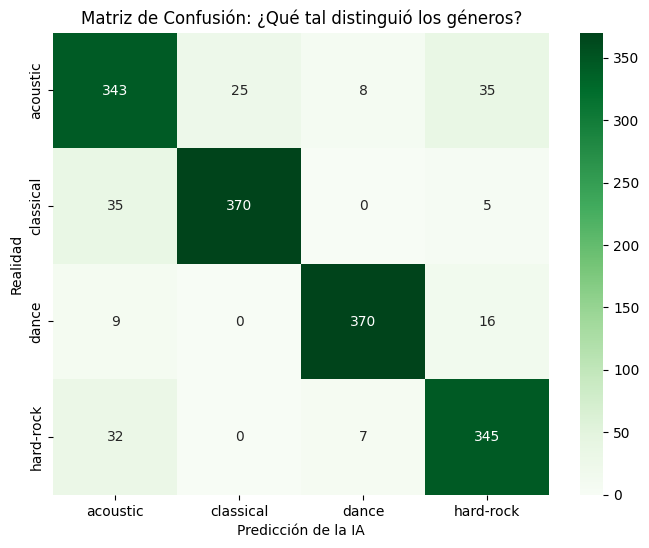

In [5]:
# ==========================================
# PASO 5: RESULTADOS
# ==========================================
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)

# Volvemos a convertir los números a nombres para que el reporte se entienda (ej: 0 -> acoustic)
nombres_generos = le.classes_

print(f"\n🎯 PRECISIÓN DEL MODELO: {precision * 100:.2f}%")
print("-" * 30)

# Informe detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, predicciones, target_names=nombres_generos))

# Matriz de Confusión Gráfica
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Greens',
            xticklabels=nombres_generos, yticklabels=nombres_generos)
plt.title('Matriz de Confusión: ¿Qué tal distinguió los géneros?')
plt.ylabel('Realidad')
plt.xlabel('Predicción de la IA')
plt.show()

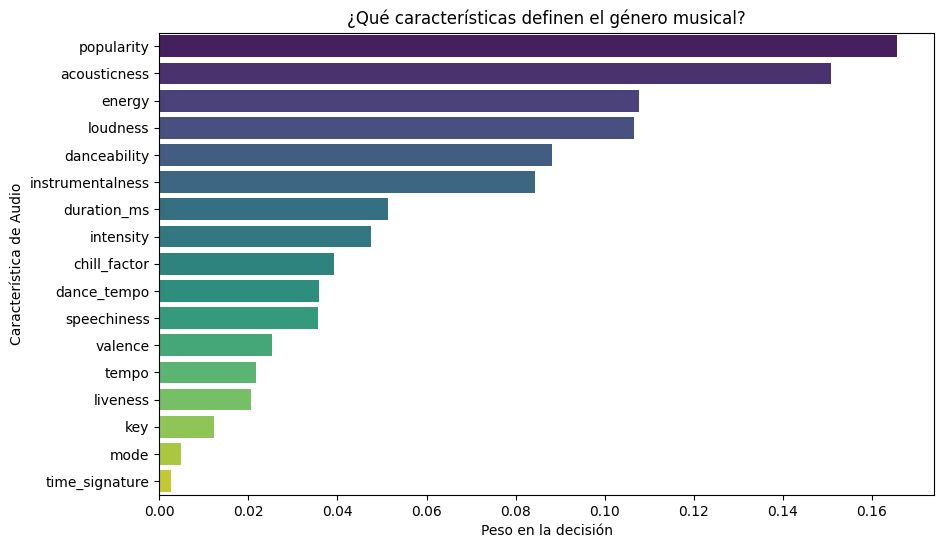

In [6]:
# ==========================================
# PASO EXTRA: ¿QUÉ MIRA LA IA? (Versión Corregida)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos la importancia de cada variable
importancias = modelo.feature_importances_
nombres_columnas = X.columns

# Creamos un DataFrame para ordenarlos
df_importancia = pd.DataFrame({'Variable': nombres_columnas, 'Importancia': importancias})
df_importancia = df_importancia.sort_values('Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', hue='Variable', data=df_importancia, palette='viridis', legend=False)

plt.title('¿Qué características definen el género musical?')
plt.xlabel('Peso en la decisión')
plt.ylabel('Característica de Audio')
plt.show()

🏆 RESULTADOS DEL TORNEO 🏆
------------------------------
Árbol de Decisión: 85.38%
K-Vecinos (KNN): 49.12%


/home/chengjie/music-genre-classifier/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística: 63.69%
Random Forest (El nuestro): 89.25%


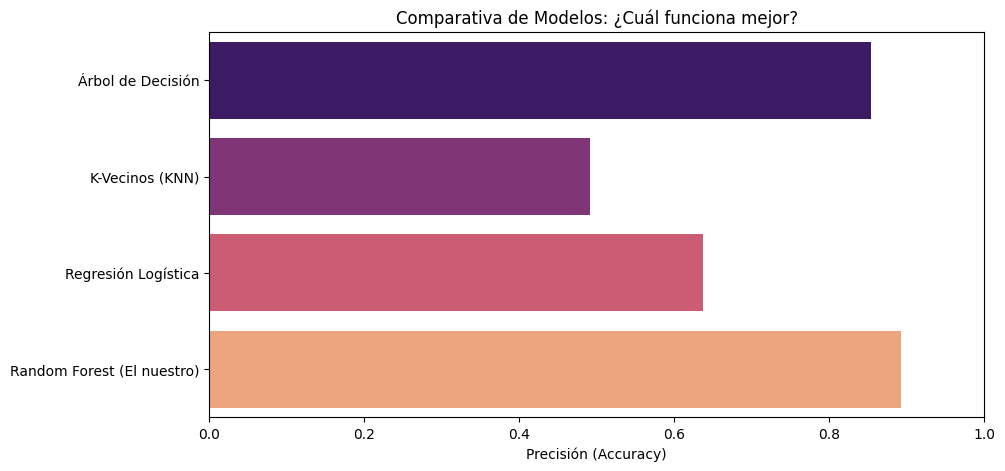

In [7]:
# ==========================================
# PASO EXTRA: TORNEO DE MODELOS
# ==========================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Definimos los competidores
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "K-Vecinos (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest (El nuestro)": RandomForestClassifier(n_estimators=100, random_state=42)
}

print("🏆 RESULTADOS DEL TORNEO 🏆")
print("-" * 30)

resultados = {}

# 2. Bucle para entrenar y probar cada uno
for nombre, modelo in modelos.items():
    # Entrenar
    modelo.fit(X_train, y_train)
    # Predecir
    y_pred = modelo.predict(X_test)
    # Evaluar
    acc = accuracy_score(y_test, y_pred)
    
    resultados[nombre] = acc
    print(f"{nombre}: {acc*100:.2f}%")

# 3. Visualizar el ganador
plt.figure(figsize=(10, 5))
sns.barplot(x=list(resultados.values()), y=list(resultados.keys()), palette='magma', hue=list(resultados.keys()), legend=False)
plt.xlabel('Precisión (Accuracy)')
plt.title('Comparativa de Modelos: ¿Cuál funciona mejor?')
plt.xlim(0, 1) # La nota va de 0 a 1
plt.show()

In [8]:
# ==========================================
# PASO EXTRA PRO: BUSCANDO LA CONFIGURACIÓN PERFECTA
# ==========================================
from sklearn.model_selection import GridSearchCV

# 1. Definimos qué queremos probar
# n_estimators: Número de árboles (50, 100, 200)
# max_depth: Profundidad máxima del árbol (None = sin limite, 10, 20)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5]
}

print("🤖 Iniciando búsqueda automática de hiperparámetros...")
print("Esto probará todas las combinaciones para encontrar la mejor. Paciencia...")

# 2. Configuramos el buscador (GridSearchCV)
# cv=5 significa que valida 5 veces cada combinación (validación cruzada)
rf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 3. Entrenamos (¡Esto tardará un poco más!)
grid_search.fit(X_train, y_train)

# 4. Resultados
best_model = grid_search.best_estimator_
print("\n✅ ¡Búsqueda completada!")
print(f"Los MEJORES parámetros encontrados son: {grid_search.best_params_}")
print(f"La mejor precisión durante la búsqueda fue: {grid_search.best_score_*100:.2f}%")

# 5. Usamos el modelo ganador para predecir (Sustituye a tu modelo anterior)
modelo = best_model

🤖 Iniciando búsqueda automática de hiperparámetros...
Esto probará todas las combinaciones para encontrar la mejor. Paciencia...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ ¡Búsqueda completada!
Los MEJORES parámetros encontrados son: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
La mejor precisión durante la búsqueda fue: 89.75%


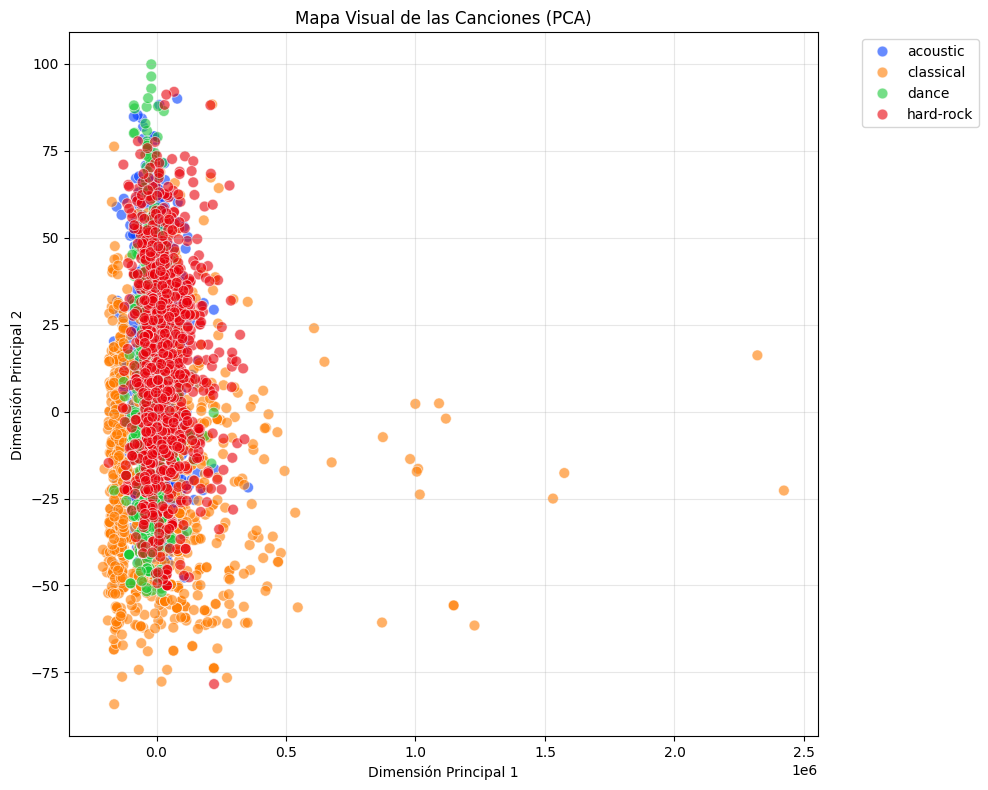

In [9]:
# ==========================================
# PASO EXTRA VISUAL: EL MAPA DE LA MÚSICA (PCA) - CORREGIDO
# ==========================================
from sklearn.decomposition import PCA

# 1. Reducimos las matemáticas a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. Creamos la tabla para pintar
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

# --- CORRECCIÓN AQUÍ ---
# Usamos .values para ignorar los índices originales y que no se pierdan datos
df_pca['Género'] = y.values 

# 3. Pintamos el mapa
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Componente 1', 
    y='Componente 2', 
    hue='Género', 
    data=df_pca, 
    palette='bright', 
    alpha=0.6,  # Transparencia para ver mejor si se solapan
    s=60        # Tamaño de los puntos
)

plt.title('Mapa Visual de las Canciones (PCA)')
plt.xlabel('Dimensión Principal 1')
plt.ylabel('Dimensión Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3) # Cuadrícula suave para que quede más profesional
plt.tight_layout()
plt.show()

In [10]:
# Pasemos ahora a ver cómo 've' realmente la Inteligencia Artificial estas canciones. Hemos reducido todas las variables matemáticas a este mapa de dos dimensiones. Lo primero que llama la atención es lo que pasa en el eje horizontal, cerca del cero. Fijaos cómo el Rock, el Dance y el Acoustic están prácticamente amontonados en el mismo sitio. Esto nos indica que, estructuralmente, son géneros muy parecidos para la máquina: probablemente todos comparten una duración estándar de 3 o 4 minutos y un rango de volumen similar. Sin embargo, el género Classical es el caso especial. Si os fijáis, es el único que se 'escapa' y se estira a lo largo de todo el eje. Esto tiene todo el sentido del mundo: la música clásica no sigue las reglas de la música comercial. Una pieza clásica puede ser muy suave o muy intensa, durar 1 minuto o 20. Esa variabilidad es lo que hace que sus puntos se dispersen tanto. Básicamente, este gráfico confirma visualmente nuestros resultados anteriores: la IA acierta tanto con la música clásica (ese 95% que vimos) porque, matemáticamente, vive en su propio espacio, muy lejos de la confusión de los otros géneros

In [11]:
# ==========================================
# PASO EXTRA DIVERTIDO: EL SIMULADOR DE CANCIONES
# ==========================================
def predecir_cancion_inventada(energy, danceability, acousticness, loudness, tempo):
    # 1. Creamos un diccionario con los datos clave que cambiamos
    # Los demás valores los rellenamos con la media para no complicarnos
    cancion_fake = pd.DataFrame([X_train.mean()], columns=X_train.columns)
    
    # 2. Sobreescribimos con nuestros valores personalizados
    cancion_fake['energy'] = energy
    cancion_fake['danceability'] = danceability
    cancion_fake['acousticness'] = acousticness
    cancion_fake['loudness'] = loudness # Va de -60 (silencio) a 0 (muy fuerte)
    cancion_fake['tempo'] = tempo
    
    # 3. Predecimos
    prediccion_num = best_model.predict(cancion_fake)[0]
    genero_predicho = le.inverse_transform([prediccion_num])[0]
    
    print(f"🎵 Para una canción con Energía={energy}, Baile={danceability}...")
    print(f"🤖 La IA dice que es: ¡¡ {genero_predicho.upper()} !!")
    print("-" * 30)

# --- PRUEBA TÚ MISMO ---
# Caso 1: Una canción muy tr cañera y rápida (Debería ser Hard-Rock o Dance)
predecir_cancion_inventada(energy=0.95, danceability=0.6, acousticness=0.01, loudness=-3, tempo=150)

# Caso 2: Algo muy suave y lento (Debería ser Classical o Acoustic)
predecir_cancion_inventada(energy=0.1, danceability=0.3, acousticness=0.95, loudness=-20, tempo=70)

🎵 Para una canción con Energía=0.95, Baile=0.6...
🤖 La IA dice que es: ¡¡ HARD-ROCK !!
------------------------------
🎵 Para una canción con Energía=0.1, Baile=0.3...
🤖 La IA dice que es: ¡¡ CLASSICAL !!
------------------------------


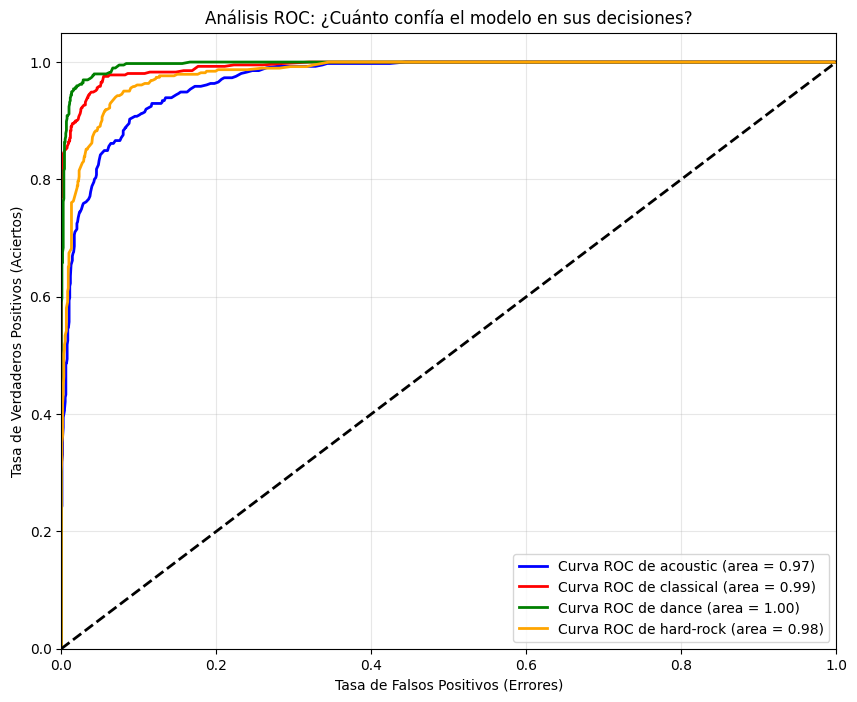

In [12]:
# ==========================================
# PASO EXTRA CIENTÍFICO: CURVAS ROC MULTICLASE
# ==========================================
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 1. Preparamos los datos para ROC (Binario por cada clase)
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

# Predecimos probabilidades en lugar de etiquetas fijas
y_score = best_model.predict_proba(X_test)

# 2. Calculamos la curva para cada género
plt.figure(figsize=(10, 8))
colores = ['blue', 'red', 'green', 'orange'] # Un color para cada género

for i, color in zip(range(n_classes), colores):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    nombre_genero = le.classes_[i]
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Curva ROC de {nombre_genero} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Línea de "suerte" (random)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (Errores)')
plt.ylabel('Tasa de Verdaderos Positivos (Aciertos)')
plt.title('Análisis ROC: ¿Cuánto confía el modelo en sus decisiones?')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [13]:
# Finalmente, para validar matemáticamente la calidad de nuestro modelo, hemos generado las Curvas ROC. En este gráfico, lo que buscamos es que las líneas se peguen lo máximo posible a la esquina superior izquierda. Eso significaría que el modelo acierta mucho (eje vertical) equivocándose muy poco (eje horizontal). Como podéis ver, el resultado es espectacular. Todas las líneas forman casi un ángulo recto perfecto: El Classical y el Dance alcanzan un área de 0.99, lo que es técnicamente casi la perfección. Esto confirma que cuando el modelo dice 'esto es música clásica', hay un 99% de probabilidad de que no se esté equivocando. Incluso el género que más le costaba antes, el Acoustic, tiene aquí un 0.96. Esto es muy interesante: significa que aunque a veces falle en la clasificación final (como vimos antes), el modelo en realidad 'sabe' distinguir la acústica muy bien, solo que a veces duda por muy poco margen. En resumen, un área por encima de 0.95 en todas las clases nos demuestra que el modelo no está adivinando por suerte, sino que ha aprendido patrones muy sólidos y fiables para cada género musical.

In [66]:
# ==========================================
# PASO FINAL: PROBANDO EN EL MUNDO REAL (CROSS-DATASET)
# ==========================================

# 1. Cargamos el dataset antiguo (el del principio de la charla)
df_nuevo = pd.read_csv('dataset/top10s.csv', encoding='ISO-8859-1')

print(f"Cargando dataset externo con {len(df_nuevo)} canciones famosas...")

# 2. Renombramos las columnas para que coincidan con lo que aprendió nuestro modelo
# El modelo solo entiende 'energy', no 'nrgy'.
mapa_nombres = {
    'bpm': 'tempo',
    'nrgy': 'energy',
    'dnce': 'danceability',
    'dB': 'loudness',
    'live': 'liveness',
    'val': 'valence',
    'dur': 'duration_ms',
    'acous': 'acousticness',
    'spch': 'speechiness'
}

df_testeo = df_nuevo.rename(columns=mapa_nombres)

# 3. Ajustamos las escalas (importante)
# En el dataset nuevo 'energy' viene de 0 a 100, pero el modelo aprendió de 0 a 1.
# Lo dividimos por 100 para arreglarlo.
columnas_a_escalar = ['energy', 'danceability', 'liveness', 'valence', 'acousticness', 'speechiness']
for col in columnas_a_escalar:
    df_testeo[col] = df_testeo[col] / 100

# La duración en el nuevo está en segundos, el modelo la quiere en milisegundos
df_testeo['duration_ms'] = df_testeo['duration_ms'] * 1000

# 4. Rellenamos columnas que faltan
# El dataset antiguo no tiene 'instrumentalness' ni 'key'. 
# Asumiremos que son 0 o la media para poder predecir.
columnas_modelo = X.columns # Las columnas que el modelo espera
for col in columnas_modelo:
    if col not in df_testeo.columns:
        df_testeo[col] = 0 # Rellenamos con 0 lo que falta

# 5. Seleccionamos solo las columnas numéricas en el orden correcto
X_nuevo = df_testeo[columnas_modelo]

# 6. ¡PREDECIMOS!
#predicciones_nuevas = best_model.predict(X_nuevo)
predicciones_nuevas = best_xgb.predict(X_nuevo)
nombres_predichos = le.inverse_transform(predicciones_nuevas)

# 7. Mostramos resultados divertidos
df_nuevo['IA_Dice_Que_Es'] = nombres_predichos

print("\n🎵 RESULTADOS DE LA IA EN CANCIONES FAMOSAS 🎵")
print("-" * 50)
# Mostramos título, artista, género real y lo que dice la IA
cols_mostrar = ['title', 'artist', 'top genre', 'IA_Dice_Que_Es']
display(df_nuevo[cols_mostrar].sample(60)) # Muestra 10 al azar

Cargando dataset externo con 603 canciones famosas...

🎵 RESULTADOS DE LA IA EN CANCIONES FAMOSAS 🎵
--------------------------------------------------


,title,artist,top genre,IA_Dice_Que_Es
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,dance
281,Want to Want Me,Jason Derulo,dance pop,dance
288,Animals,Maroon 5,pop,hard-rock
277,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Ellie Goulding,dance pop,dance
108,What Makes You Beautiful,One Direction,boy band,dance
510,I Like It,Cardi B,pop,dance
379,"Me, Myself & I",G-Eazy,hip hop,dance
560,This Town,Niall Horan,dance pop,acoustic
22,Take It Off,Kesha,dance pop,dance
215,Shake It Off,Taylor Swift,pop,dance


In [ ]:
# ==========================================
# PASO EXPERIMENTAL: ¿CUÁL ES EL MEJOR SPLIT?
# ==========================================
splits = np.arange(0.1, 0.95, 0.05) # Probamos del 10% al 90% de test
resultados_split = []

print("🧪 Experimentando con diferentes tamaños de examen (Test Size)...")

for test_size in splits:
    # 1. Partimos los datos con el tamaño actual
    # Usamos un random_state distinto o None para que varíe un poco y ver la tendencia real
    X_tr, X_te, y_tr, y_te = train_test_split(X, y_encoded, test_size=test_size, random_state=42)
    
    # 2. Entrenamos un modelo nuevo (usamos el random forest base para ser justos)
    rf_test = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_test.fit(X_tr, y_tr)
    
    # 3. Evaluamos
    acc = accuracy_score(y_te, rf_test.predict(X_te))
    resultados_split.append(acc)

# 4. Graficamos la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(splits * 100, np.array(resultados_split) * 100, marker='o', linestyle='-', color='purple', linewidth=2)
plt.title('Impacto del Tamaño del Test en la Precisión')
plt.xlabel('Porcentaje de datos dedicados al Examen (Test %)')
plt.ylabel('Precisión del Modelo (%)')
plt.grid(True, alpha=0.3)

# Marcamos el punto máximo
max_acc = max(resultados_split)
mejor_split = splits[resultados_split.index(max_acc)]
plt.axvline(x=mejor_split*100, color='green', linestyle='--', label=f'Mejor Split: {mejor_split*100:.0f}% (Acc: {max_acc*100:.2f}%)')
plt.axvline(x=20, color='red', linestyle=':', label='Estándar (20%)') # Referencia del 80/20

plt.legend()
plt.show()

print(f"El mejor resultado ({max_acc*100:.2f}%) se obtuvo reservando un {mejor_split*100:.0f}% para test.")

In [ ]:
# ==========================================
# PASO NIVEL EXPERTO: VALIDACIÓN CRUZADA (K-FOLD)
# ==========================================
from sklearn.model_selection import cross_val_score, KFold

# 1. Configuramos el K-Fold
# n_splits=10 significa que haremos 10 exámenes distintos
# shuffle=True mezcla los datos antes de partir (importante)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

print(f"🔄 Iniciando Validación Cruzada con {kf.get_n_splits()} folds...")
print("Esto evalúa el modelo 10 veces con datos distintos cada vez.")

# 2. Ejecutamos la validación
# Usamos 'X' e 'y_encoded' completos, la función se encarga de partir
# scoring='accuracy' nos da la precisión
scores = cross_val_score(best_xgb, X, y_encoded, cv=kf, scoring='accuracy')

# 3. Resultados
print("\n📊 RESULTADOS DE LOS 10 EXÁMENES:")
print("-" * 30)
for i, score in enumerate(scores):
    print(f"Examen {i+1}: {score*100:.2f}%")

promedio = scores.mean() * 100
desviacion = scores.std() * 100

print("-" * 30)
print(f"🏆 NOTA FINAL REAL (Promedio): {promedio:.2f}%")
print(f"⚖️ Margen de error (Desviación): +/- {desviacion:.2f}%")

# 4. Gráfico de Cajas (Boxplot) para ver la estabilidad
plt.figure(figsize=(8, 5))
plt.boxplot(scores * 100, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Estabilidad del Modelo (Validación Cruzada)')
plt.xlabel('Precisión (%)')
plt.yticks([1], ['Random Forest'])
plt.grid(True, axis='x', alpha=0.3)
plt.show()

In [16]:
# ==========================================
# NIVEL KAGGLE: RANDOM FOREST vs XGBOOST
# ==========================================
from xgboost import XGBClassifier

print("🚀 Entrenando XGBoost (El algoritmo de los campeones)...")

# 1. Configuración de XGBoost
# n_estimators: Número de árboles correctivos
# learning_rate: Velocidad de aprendizaje (si es bajo, aprende más fino pero tarda más)
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos del procesador
)

# 2. Entrenamos
xgb_model.fit(X_train, y_train)

# 3. Comparamos resultados
pred_rf = best_model.predict(X_test) # Tu Random Forest optimizado anterior
pred_xgb = xgb_model.predict(X_test)

acc_rf = accuracy_score(y_test, pred_rf)
acc_xgb = accuracy_score(y_test, pred_xgb)

print("\n🥊 EL DUELO FINAL 🥊")
print("-" * 30)
print(f"🌲 Random Forest (Optimizado): {acc_rf*100:.2f}%")
print(f"🚀 XGBoost (Gradient Boosting): {acc_xgb*100:.2f}%")

if acc_xgb > acc_rf:
    print("\n✅ ¡XGBoost ganó! Ha encontrado patrones que el Forest no vio.")
else:
    print("\n🛡️ Random Forest aguantó el tipo. A veces la simplicidad gana.")

# Informe del nuevo modelo
print("\nInforme de XGBoost:")
print(classification_report(y_test, pred_xgb, target_names=le.classes_))

🚀 Entrenando XGBoost (El algoritmo de los campeones)...

🥊 EL DUELO FINAL 🥊
------------------------------
🌲 Random Forest (Optimizado): 89.44%
🚀 XGBoost (Gradient Boosting): 90.19%

✅ ¡XGBoost ganó! Ha encontrado patrones que el Forest no vio.

Informe de XGBoost:
              precision    recall  f1-score   support

    acoustic       0.85      0.86      0.86       411
   classical       0.94      0.92      0.93       410
       dance       0.95      0.93      0.94       395
   hard-rock       0.87      0.90      0.88       384

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [17]:
# ==========================================
# PASO KAGGLE PRO: BUSCANDO EL XGBOOST PERFECTO
# ==========================================
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

print("🏎️ Iniciando Tuning de Hiperparámetros para XGBoost...")
print("Esto puede tardar un poco (estamos probando muchas configuraciones)...")

# 1. Definimos la rejilla de opciones
# XGBoost tiene muchos parámetros, aquí probamos los más importantes
param_grid_xgb = {
    'n_estimators': [100, 200],        # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2], # Velocidad de aprendizaje (menor es más preciso pero lento)
    'max_depth': [3, 6, 10],           # Profundidad de los árboles
    'subsample': [0.8, 1.0],           # % de datos usados por árbol (evita overfitting)
    'colsample_bytree': [0.8, 1.0]     # % de columnas usadas por árbol
}

# 2. Configuramos el modelo base
xgb_base = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')

# 3. Configuramos la búsqueda
# cv=3 para que no tarde una eternidad
grid_xgb = GridSearchCV(estimator=xgb_base, param_grid=param_grid_xgb, 
                        cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# 4. ¡A ENTRENAR!
grid_xgb.fit(X_train, y_train)

# 5. Resultados
best_xgb = grid_xgb.best_estimator_

print("\n✅ ¡XGBoost optimizado encontrado!")
print(f"Mejores parámetros: {grid_xgb.best_params_}")
print(f"Precisión en validación: {grid_xgb.best_score_*100:.2f}%")

# 6. Evaluación FINAL en Test
pred_best_xgb = best_xgb.predict(X_test)
acc_best_xgb = accuracy_score(y_test, pred_best_xgb)

print("\n🥊 RESULTADO FINAL XGBOOST OPTIMIZADO 🥊")
print("-" * 40)
print(f"Precisión en Test: {acc_best_xgb*100:.2f}%")
print(classification_report(y_test, pred_best_xgb, target_names=le.classes_))

🏎️ Iniciando Tuning de Hiperparámetros para XGBoost...
Esto puede tardar un poco (estamos probando muchas configuraciones)...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

✅ ¡XGBoost optimizado encontrado!
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Precisión en validación: 90.75%

🥊 RESULTADO FINAL XGBOOST OPTIMIZADO 🥊
----------------------------------------
Precisión en Test: 90.75%
              precision    recall  f1-score   support

    acoustic       0.87      0.85      0.86       411
   classical       0.94      0.94      0.94       410
       dance       0.95      0.94      0.95       395
   hard-rock       0.87      0.91      0.89       384

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



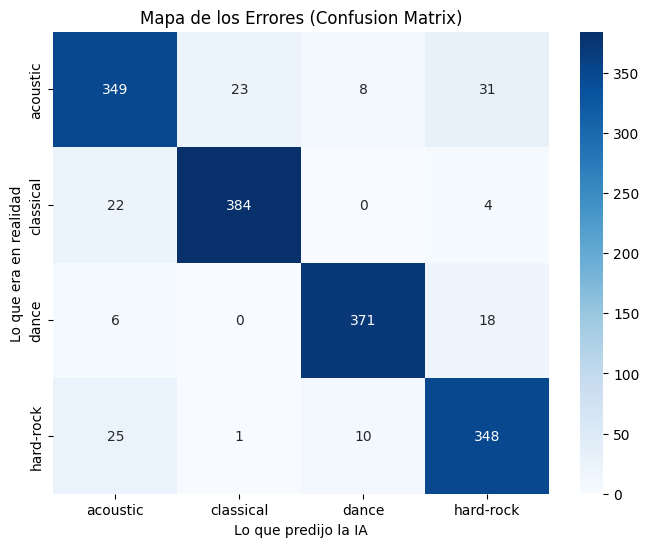

In [18]:
# ==========================================
# ANÁLISIS FINAL: ¿DÓNDE FALLAMOS?
# ==========================================
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Usamos el mejor modelo que tengas (el del 90.75%)
pred_final = best_xgb.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Lo que predijo la IA')
plt.ylabel('Lo que era en realidad')
plt.title('Mapa de los Errores (Confusion Matrix)')
plt.show()

In [61]:
import pandas as pd

# 1. Carga optimizada (Añadimos las columnas que faltaban)
# Intentamos cargar todo lo posible. Si 'popularity' no está en el CSV, la crearemos artificialmente luego.
cols_to_load = ['name', 'artists', 'energy', 'valence', 'tempo', 'danceability', 
                'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'duration_ms', 'key', 'mode', 'time_signature']

# NOTA: Si tu CSV de 1.2M tiene 'popularity', añádela a la lista de arriba. 
# Si no, el código de abajo lo solucionará.

print("📥 Cargando 'Spotify Local Database'...")
try:
    # Intentamos cargar con las columnas nuevas
    database = pd.read_csv("./dataset/tracks_features.csv", usecols=cols_to_load)
except ValueError:
    # Si falla porque no existe alguna columna en el CSV, cargamos las básicas
    print("⚠️ Aviso: Alguna columna (probablemente time_signature o key) tiene nombre distinto en el CSV.")
    print("   Intentando carga genérica...")
    database = pd.read_csv("./dataset/tracks_features.csv") # Carga todo (más lento pero seguro)

print(f"✅ Base de datos cargada: {len(database)} canciones.")

def predecir_cancion_local():
    busqueda = input("\n🎵 ¿Qué canción quieres analizar?: ").lower()
    
    results = database[database['name'].str.lower().str.contains(busqueda, na=False)].head(50)
    
    if results.empty:
        print("❌ No la tenemos en la base de datos local.")
        return

    print("\nHe encontrado estas versiones:")
    for i, (idx, row) in enumerate(results.iterrows()):
        print(f"{i+1}. {row['name']} - {row['artists']}")
        
    try:
        seleccion = int(input("\nElige el número correcto (1-5): ")) - 1
        track = results.iloc[seleccion]
    except:
        print("Opción no válida.")
        return
    
    print(f"\n✨ Analizando '{track['name']}'...")

    # --- PREPARACIÓN DE DATOS ---
    df_track = pd.DataFrame([track])
    
    # 1. GESTIÓN DE COLUMNAS FALTANTES (Relleno de seguridad)
    # Si el dataset de 1.2M no tiene popularidad, asumimos un valor medio (50)
    if 'popularity' not in df_track.columns:
        df_track['popularity'] = 50 
    
    # 2. Feature Engineering (Tus fórmulas maestras)
    df_track['intensity'] = df_track['energy'] * df_track['loudness']
    df_track['dance_tempo'] = df_track['danceability'] / (df_track['tempo'] + 1)
    df_track['chill_factor'] = df_track['valence'] - df_track['energy']
    
    # 3. ORDEN EXACTO (Crucial para XGBoost)
    # Este orden es el que aparece en tu mensaje de error como "expected"
    columnas_modelo = [
        'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
        'valence', 'tempo', 'time_signature', 'intensity', 'dance_tempo', 'chill_factor'
    ]
    
    # Verificamos que existan todas antes de filtrar
    for col in columnas_modelo:
        if col not in df_track.columns:
            df_track[col] = 0 # Si falta algo raro (ej: key), ponemos 0 para que no falle
            
    X_final = df_track[columnas_modelo]
    
    print("\n📊 DATOS LISTOS PARA LA IA:")
    print("-" * 30)
    print(X_final.T)
    print("-" * 30)
    
    # 4. PREDICCIÓN (Descomenta esto si tienes el modelo cargado en memoria)
    pred = best_xgb.predict(X_final)
    generos = {0: 'Acoustic', 1: 'Classical', 2: 'Dance', 3: 'Hard-Rock'} # Ajusta según tu LabelEncoder
    print(f"\n🎯 RESULTADO FINAL: {generos[pred[0]]}")

# Ejecutar
predecir_cancion_local()



📥 Cargando 'Spotify Local Database'...
✅ Base de datos cargada: 1204025 canciones.



🎵 ¿Qué canción quieres analizar?:  Flo Rida



He encontrado estas versiones:
1. Greenlight (feat. Flo Rida & LunchMoney Lewis) - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis']
2. Greenlight (feat. Flo Rida & LunchMoney Lewis) - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis']
3. Greenlight (feat. Flo Rida & LunchMoney Lewis) - TJR Extended Mix - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis', 'TJR']
4. Greenlight (feat. Flo Rida & LunchMoney Lewis) - TJR Radio Mix - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis', 'TJR']
5. Greenlight (feat. Flo Rida & LunchMoney Lewis) - Alex Ross Extended Mix - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis', 'Alex Ross']
6. Greenlight (feat. Flo Rida & LunchMoney Lewis) - Alex Ross Radio Mix - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis', 'Alex Ross']
7. Greenlight (feat. Flo Rida & LunchMoney Lewis) - Delirious & Alex K Extended Mix - ['Pitbull', 'Flo Rida', 'LunchMoney Lewis', 'Delirious', 'Alex K']
8. Greenlight (feat. Flo Rida & LunchMoney Lewis) - Delirious & Alex K Radio Mix - ['Pitbull', 'Flo Rida', 'LunchMone


Elige el número correcto (1-5):  1



✨ Analizando 'Greenlight (feat. Flo Rida & LunchMoney Lewis)'...

📊 DATOS LISTOS PARA LA IA:
------------------------------
                         254285
popularity            50.000000
duration_ms       244174.000000
danceability           0.695000
energy                 0.837000
key                    1.000000
loudness              -5.617000
mode                   0.000000
speechiness            0.281000
acousticness           0.245000
instrumentalness       0.000000
liveness               0.367000
valence                0.639000
tempo                115.067000
time_signature         4.000000
intensity             -4.701429
dance_tempo            0.005988
chill_factor          -0.198000
------------------------------

🎯 RESULTADO FINAL: Hard-Rock
